In [16]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import plotly.express as px

In [17]:
hidden_units=50
time_steps=2
input_shape=(time_steps,1)

model=Sequential()

model.add(SimpleRNN(hidden_units,input_shape=input_shape,return_sequences=True,activation='tanh'))
model.add(Dropout(0.2))
model.add(SimpleRNN(hidden_units,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(hidden_units,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(hidden_units))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='tanh'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
data=pd.read_csv('meta.csv')
#data=data["Sunspots"]
scaler=MinMaxScaler(feature_range=(0,1))
column=['X']
data=scaler.fit_transform(data[column]).flatten()

In [19]:
n=len(data)
split=int(n*0.9)
train_data=data[range(split)]
test_data=data[split:]


In [20]:
y_ind=np.arange(time_steps,len(train_data),time_steps)
y_train=train_data[y_ind]
x_train=train_data[range(len(y_train)*time_steps)]
x_train=np.reshape(x_train,(len(y_train),time_steps,1))

y_ind=np.arange(time_steps,len(test_data),time_steps)
y_test=test_data[y_ind]
x_test=train_data[range(len(y_test)*time_steps)]
x_test=np.reshape(x_test,(len(y_test),time_steps,1))


In [21]:
model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
6/6 - 3s - loss: 0.0700 - 3s/epoch - 470ms/step
Epoch 2/100
6/6 - 0s - loss: 0.0304 - 15ms/epoch - 2ms/step
Epoch 3/100
6/6 - 0s - loss: 0.0195 - 15ms/epoch - 2ms/step
Epoch 4/100
6/6 - 0s - loss: 0.0142 - 14ms/epoch - 2ms/step
Epoch 5/100
6/6 - 0s - loss: 0.0114 - 14ms/epoch - 2ms/step
Epoch 6/100
6/6 - 0s - loss: 0.0099 - 15ms/epoch - 3ms/step
Epoch 7/100
6/6 - 0s - loss: 0.0106 - 14ms/epoch - 2ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0122 - 15ms/epoch - 2ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0093 - 15ms/epoch - 2ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0077 - 14ms/epoch - 2ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0076 - 15ms/epoch - 2ms/step
Epoch 12/100
6/6 - 0s - loss: 0.0071 - 14ms/epoch - 2ms/step
Epoch 13/100
6/6 - 0s - loss: 0.0071 - 14ms/epoch - 2ms/step
Epoch 14/100
6/6 - 0s - loss: 0.0077 - 17ms/epoch - 3ms/step
Epoch 15/100
6/6 - 0s - loss: 0.0066 - 24ms/epoch - 4ms/step
Epoch 16/100
6/6 - 0s - loss: 0.0072 - 20ms/epoch - 3ms/step
Epoch 17/100
6/6 - 0s - loss: 0.0

In [22]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

1/1 [==============================] - 0s 16ms/step


In [23]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

In [24]:
print_error(y_train,y_test,train_pred,test_pred)

Train RMSE: 0.032 RMSE
Test RMSE: 0.479 RMSE


In [28]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(20, 5), dpi=100)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    #plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

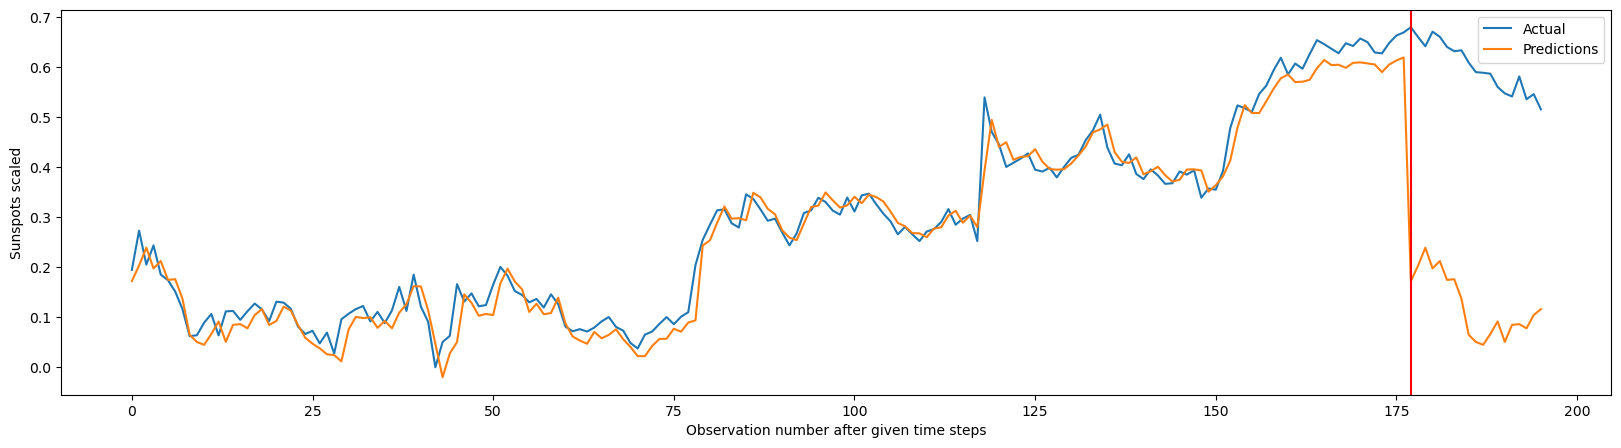

In [29]:
plot_result(y_train,y_test,train_pred,test_pred)

In [27]:
graph=pd.read_csv('graph.csv')
fig=px.line(graph,x=graph['X'],y=graph['Y'],title='Graph')
fig.show()